# Machine Learning for Superconductivity Classification

In this project, we witness the applicability of Machine Learning in the fields of Physics and Materials Science. 

Superconductors can be classified into Type 1 and Type 2. Materials that are Type 2 superconductors are famously known to exhibit the Meissner Effect, or "Quantum Levitation", wherein magnetic field "vortices" (see the dots in the figure) can lock them into position.

![](https://drive.google.com/uc?export=view&id=1ek3nZgBaUnTL1BS7bay4GX7g62BeNydC)

Now, imagine you're in charge of a team of engineers and physicists tasked with building a house that floats mid-air. After months of collectively wondering how such a feat could possibly be achieved, you've found a potential lead- Quantum Levitation.

Your team is looking for a superconducting material that would best suit your goal. Say, you've got your hands on a rare superconductor, but you do not have access to a laboratory to tinker with its characteristics. Without any experimental setup, how would you know whether your superconductor is Type 1 or Type 2? Note that no physical or mathematical theory exists that can allow us to determine with full certainty that our superconductor belongs to a particular class.

This is where Machine Learning comes in. Using a dataset of the properties of various superconducting materials, we shall build a binary classification model capable of identifying whether a material is a Type 1 or Type 2 superconductor, based on nothing but its *other* properties!


In [ ]:
#@title Run this cell for all our imports.

import gdown
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.preprocessing import StandardScaler

import matplotlib.style as style
sns.set()
style.use('seaborn-talk')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Introduction to Superconductivity: Adjust your thinking caps, it's Physics time!

Superconductors are objects that possess infinite conductivity when cooled below a certain temperature $T_c$ called 'critical temperature'. In other words, charged particles (electrons) flow in a superconducting material with exactly zero electrical resistance. 



Superconductors are used in MRI scanners, particle colliders, and even the Qubits that make [Quantum Computing](https://www.ibm.com/quantum-computing/) possible.

They are generally classified into two different types- "conventional" (Type 1) and "unconventional" (Type 2). The primary difference between these two classes is the underlying mechanism through which the material conducts electricity. Another important distinction between the two is that Type 2 superconductors have relatively higher critical temperatures, making them accessible for use in technology.

Type 2 superconductors exhibit something called the Meissner Effect, or "Quantum Levitation" ([here's a cool TED talk](https://youtu.be/PXHczjOg06w) about it). Essentially, a Type 2 superconductor likes to lock into place when under the influence of a magnetic field; if we exert any force on such a "locked" superconductor, it tends to resist the force and stay balanced in position. In fact, the car company [Lexus made a hoverboard](https://youtu.be/oyGlNLpQ7CQ) demonstrating the potential of this kind of technology:


![](https://i.guim.co.uk/img/media/214ea927bf4c925036c79e3cc274d138bbc45cb2/295_0_2344_1407/master/2344.jpg?width=640&quality=85&auto=format&fit=max&s=8275652f61d0c6117920530b632257e6)

The goal of our Machine Learning model is to identify whether a material is a Type 2 superconductor based on its properties.

## Superconductor Type dataset

To train our model, we shall use a dataset from a [Japanese database](https://supercon.nims.go.jp/en/) that was utilised in [this paper by K. Hamidieh (2018)](https://doi.org/10.1016/j.commatsci.2018.07.052). 

Our data consists of 21263 materials, each of which has associated with it 82 different experimentally measured quantities that describe various properties of the material. These properties are important to us because they contain the features using which our model can learn to differentiate between Type 1 and Type 2 superconductors.

Note that our data also consists of the labels, namely the superconductivity type.

In [ ]:
#@title Run this cell to download your data!

import gdown
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

gdown.download('https://drive.google.com/uc?id=13UU9Wy7iNSeHzUDxOT8IMKOa-zL8SOb2','Data.zip', True);
!unzip 'Data.zip'
dataset = pd.read_csv('dataset_reduced.csv')

Archive:  Data.zip
  inflating: dataset.csv             
  inflating: dataset_reduced.csv     


If you see "replace dataset.csv?", don't be alarmed. This happens simply because the same data has been imported by running the cell twice.


## Exploring our dataset
First off, we need to load in the data that we've imported (using which we shall train our model to identify what type of superconductor a material is). Let's have a look at the full dataset first.
Notice that each row corresponds to one material and that the 'material' column stores the name (similar to a chemical formula) of that particular material. You may be able to deduce from the first column that these materials are the combinations of different elements in various proportions.

Run the following cell to view the full dataset.

In [ ]:
pd.read_csv('dataset.csv') #pd.read_csv('file_name') reads in our data

,material,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,...,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,Ba0.2La1.8Cu1O4,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,775.425000,1010.268571,718.152900,938.016780,1.305967,0.791488,810.6,735.985714,323.811808,355.562967,160.250000,105.514286,136.126003,84.528423,1.259244,1.207040,205,42.914286,75.237541,69.235569,4654.35725,2961.502286,724.953211,53.543811,1.033129,0.814598,8958.571,1579.583429,...,111.727143,60.123179,99.414682,1.159687,0.787382,127.05,80.987143,51.433712,42.558396,6.905500,3.846857,3.479475,1.040986,1.088575,0.994998,12.878,1.744571,4.599064,4.666920,107.756645,61.015189,7.062488,0.621979,0.308148,0.262848,399.97342,57.127669,168.854244,138.517163,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,Ba0.1La1.9Ag0.1Cu0.9O4,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,766.440000,1010.612857,720.605511,938.745413,1.544145,0.807078,810.6,743.164286,290.183029,354.963511,161.200000,104.971429,141.465215,84.370167,1.508328,1.204115,205,50.571429,67.321319,68.008817,5821.48580,3021.016571,1237.095080,54.095718,1.314442,0.914802,10488.571,1667.383429,...,112.316429,69.833315,101.166398,1.427997,0.838666,127.05,81.207857,49.438167,41.667621,7.784400,3.796857,4.403790,1.035251,1.374977,1.073094,12.878,1.595714,4.473363,4.603000,172.205316,61.372331,16.064228,0.619735,0.847404,0.567706,429.97342,51.413383,198.554600,139.630922,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,Ba0.1La1.9Cu1O4,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,775.425000,1010.820000,718.152900,939.009036,1.305967,0.773620,810.6,743.164286,323.811808,354.804183,160.250000,104.685714,136.126003,84.214573,1.259244,1.132547,205,49.314286,75.237541,67.797712,4654.35725,2999.159429,724.953211,53.974022,1.033129,0.760305,8958.571,1667.383429,...,112.213571,60.123179,101.082152,1.159687,0.786007,127.05,81.207857,51.433712,41.639878,6.905500,3.822571,3.479475,1.037439,1.088575,0.927479,12.878,1.757143,4.599064,4.649635,107.756645,60.943760,7.062488,0.619095,0.308148,0.250477,399.97342,57.127669,168.854244,138.540613,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,Ba0.15La1.85Cu1O4,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,775.425000,1010.544286,718.

Woah! That's a lot of features to sift through. One way to reduce the dimensionality of your datasets is to run a correlation study to select features that are most relevant to your classification task.
Worry not, we've done the digging for you.

Run the following cell to load in and assign a reduced dataset that stores only the relevant features and the labels for our classification.

In [ ]:
dataset = pd.read_csv('dataset_reduced.csv')
dataset.head()

,number_of_elements,mean_atomic_mass,mean_fie,mean_atomic_radius,mean_Density,mean_ElectronAffinity,mean_FusionHeat,mean_ThermalConductivity,mean_Valence,critical_temp,Superconductivity Type
0,1,102.905500,719.50,173.0,12450.0,111.20,21.70,150.0,6.0,0.000210,1
1,1,102.905500,719.50,173.0,12450.0,111.20,21.70,150.0,6.0,0.000325,1
2,1,6.941000,519.90,167.0,535.0,61.10,3.00,85.0,1.0,0.000400,1
3,2,155.892284,723.65,165.0,13305.0,127.35,7.88,201.0,4.0,0.000500,1
4,1,195.084000,868.10,177.0,21450.0,206.80,20.00,71.0,6.0,0.000620,1


That's better! Notice that the last column denotes Superconductivity Type, our label.

Now, these are still quite a lot of features. What do the columns mean?
For those of you interested, here's some definitions:

* *number_of_elements*: The total number of distinct elements in one unit of our superconductor material.
* *atomic_mass*: The mass of one atom of a chemical element.
* *atomic_radius*: The distance from the centre of the nucleus to the outermost electron shell of an atom.
* *ElectronAffinity*: The energy change observed when we add an additional electron to one atom of an element. 
* *FusionHeat*: The energy released when a substance changes from one state of matter to another.
* *ThermalConductivity*: The rate at which heat passes through a substance.
* *mean_Valence*: The valence number (the number of electrons in the outermost shell of an atom) averaged over every atom in one unit of our superconductor material.

Every atom in our material has a different value for these properties, which is why we use the mean of all these values as the property associated with our superconductor. The prefix 'mean' simply refers to taking an average over every atom in a single unit of the material. 


In [ ]:
dataset.info() # looking at the columns in our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number_of_elements        21263 non-null  int64  
 1   mean_atomic_mass          21263 non-null  float64
 2   mean_fie                  21263 non-null  float64
 3   mean_atomic_radius        21263 non-null  float64
 4   mean_Density              21263 non-null  float64
 5   mean_ElectronAffinity     21263 non-null  float64
 6   mean_FusionHeat           21263 non-null  float64
 7   mean_ThermalConductivity  21263 non-null  float64
 8   mean_Valence              21263 non-null  float64
 9   critical_temp             21263 non-null  float64
 10  Superconductivity Type    21263 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 1.8 MB


## Feature Selection
Note that it well established in science that if the critical temperature $T_c$ is relatively higher than absolute zero (or 0 kelvin), then our material is generally a Type 2 superconductor. Essentially, there is a nearly perfect correlation between Superconductivity Type and $T_c$.

The utility of our model lies in the fact that we can predict the superconductivity type of an unknown material based on the *other* properties of its elemental components, without measuring its critical temperature. To train a model capable of generalising over data enough to identify whether a novel superconducting material is Type 1 or Type 2, we shouldn't consider the critical temperature value a feature, simply because that would defeat the purpose of building such a model in the first place.

Run the following categorical plot to see the correlation between critical temperature (*critical_temp*) and Superconductivity Type.

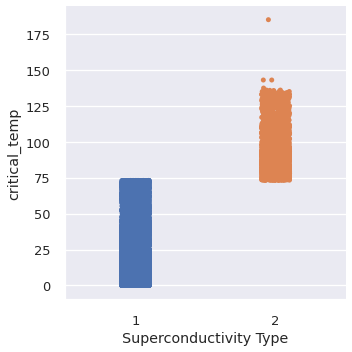

In [ ]:
sns.catplot(x = 'Superconductivity Type', y = 'critical_temp', data = dataset)
plt.show()

As the catplot shows, all Type 2 Superconductors have much higher $T_c$ values.

To be conservative, let's also drop the *mean_Valence* and *number_of_elements* columns for similar reasons.

## Setting up our Classifier
Now that you have an idea of the features  we shall use from the dataset, let's set up our classification model.

In [ ]:
X = dataset[dataset.columns[0:9]]     #input features
Y = dataset['Superconductivity Type'] #output label - type of superconductivity

seed = 1           # used for reproducibility
test_size = 0.35   # test:total ratio

# Note that we don't need to use StandardScaler().fit_transform(X) on our X data here, but it is generally a good idea to scale our input data.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_size, random_state = 1, shuffle=True) 

How do our features look? Run the following cell to look at the first five entries in our feature dataframe.

In [ ]:
X.head() 

,number_of_elements,mean_atomic_mass,mean_fie,mean_atomic_radius,mean_Density,mean_ElectronAffinity,mean_FusionHeat,mean_ThermalConductivity,mean_Valence
0,1,102.905500,719.50,173.0,12450.0,111.20,21.70,150.0,6.0
1,1,102.905500,719.50,173.0,12450.0,111.20,21.70,150.0,6.0
2,1,6.941000,519.90,167.0,535.0,61.10,3.00,85.0,1.0
3,2,155.892284,723.65,165.0,13305.0,127.35,7.88,201.0,4.0
4,1,195.084000,868.10,177.0,21450.0,206.80,20.00,71.0,6.0


For our training, we choose an Ensemble Learning model called *RandomForestClassifier*, an ensemble of "bagged" decision tree models. You can think of a Random Forest as many individual decision trees that learn on random subsets of the data to give a single final output.

Learn more about [Ensemble Learning](https://towardsdatascience.com/ensemble-methods-in-machine-learning-what-are-they-and-why-use-them-68ec3f9fef5f) and [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). 

In [ ]:
#@title Choose your model (experiment with different models!) { display-mode: "both" }

model = RandomForestClassifier(n_estimators=100, max_depth=14,random_state=11)

In [ ]:
#@title Train and evaluate the model { display-mode: "both" }

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:',accuracy * 100)

Accuracy: 90.528012898025


**Question:** How do you think our model performs?


To see how our model fares, let's visualise a Confusion Matrix of its performance.

Note, though, that we favor accuracy as an evaluation metric here- we want to create a model that makes correct classifications both ways. 

[]

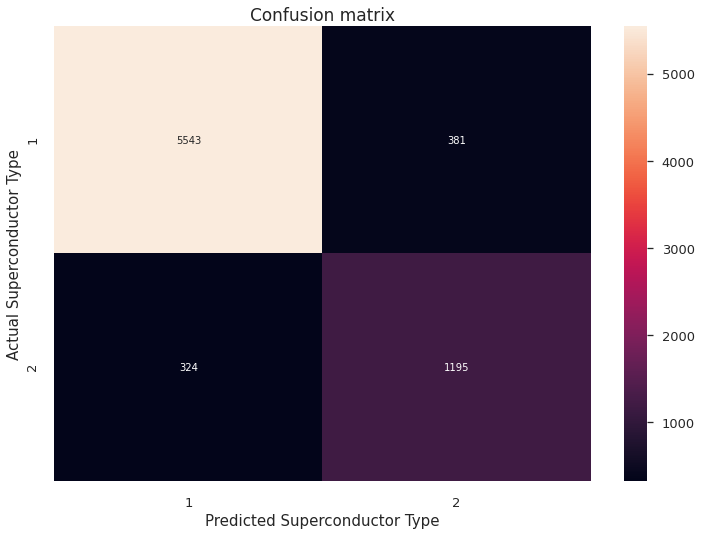

In [ ]:
#@title Confusion Matrix { display-mode: "both" }

cf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cf_matrix, annot=True , fmt='g',xticklabels=[1,2], yticklabels=[1,2])

plt.tight_layout()
plt.title('Confusion matrix',fontsize = 17)
plt.ylabel('Actual Superconductor Type',fontsize = 15)
plt.xlabel('Predicted Superconductor Type',fontsize = 15)
plt.plot()

On the whole, our model is able to identify most of the Type 1 and Type 2 superconductors correctly and with high confidence. 

Let's see which features our RandomForestClassifier gives most weight to.

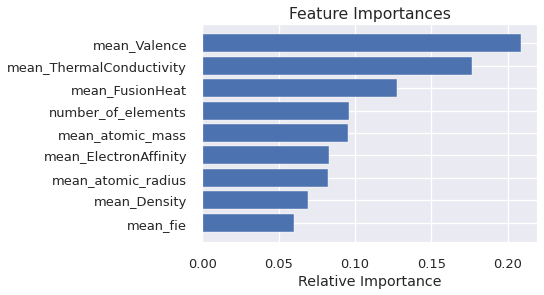

In [ ]:
pd.DataFrame({'col_name': model.feature_importances_}, index=X.columns).sort_values(by='col_name', ascending=False)

features = X.columns

importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Hyperparameter Tuning
Now that we have a model, let's try and tune its hyperparameters to see if we can make the accuracy any higher.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

estimators = np.linspace(50,200,16).astype('int')

param_grid = dict(n_estimators = estimators) # This is the hyperparameter we vary

grid = RandomizedSearchCV(model, param_grid, cv=3, 
                          scoring='accuracy',
                          return_train_score=False, 
                          n_iter=16, random_state=1)

# Since we don't use 'train_test_split' here, we should manually shuffle our data
shuffled_data = dataset.sample(frac=1).reset_index(drop=True) # Shuffling and re-indexing our dataframe

X_shuffled, y_shuffled = shuffled_data[shuffled_data.columns[1:8]], shuffled_data['Superconductivity Type']

grid.fit(X_shuffled, y_shuffled)
accdf = pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

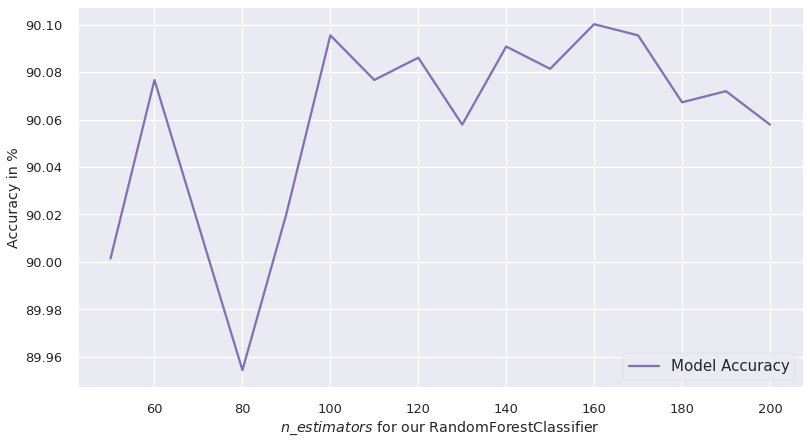

In [ ]:
#@title Plotting the Accuracy Curve
plt.figure(figsize=(13,7))
plt.plot(estimators, accdf['mean_test_score']*100, label = 'Model Accuracy', color = 'm')

plt.xlabel('$n$_$estimators$ for our RandomForestClassifier')
plt.ylabel('Accuracy in %')
plt.legend(loc='lower right', fontsize = 15)
plt.show()

All great values (hopefully)!

Take a minute to appreciate the fact that we've trained a purely computational model to identify the underlying patterns of properties of superconducting materials in nature; the model can identify relationships between a material and its elemental components in real life!

Using this model, you and your team can now move on to the next step of your ambitious plan to build a levitating house. Good luck!

# Open Challenge: Make a better Classifier!
Now that you know how to train a model to perform the classification task we need, try to build an even better classifier. You have what you need, and we've provided a list of classifiers that you can try out (feel free to find and use other models too!). 

In [ ]:
#@title Experiment with different models { display-mode: "form" }

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Some Ensemble Learners
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

classifiers = [
    KNeighborsClassifier(),
    SVC(kernel="linear"),
    GaussianProcessClassifier(1.0 * RBF()),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(), XGBClassifier()] 